In [1]:
import numpy as np
import pandas as pd
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ds_iris = datasets.load_iris(as_frame=True)
ds_iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [3]:
df_iris = pd.DataFrame(ds_iris['data'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


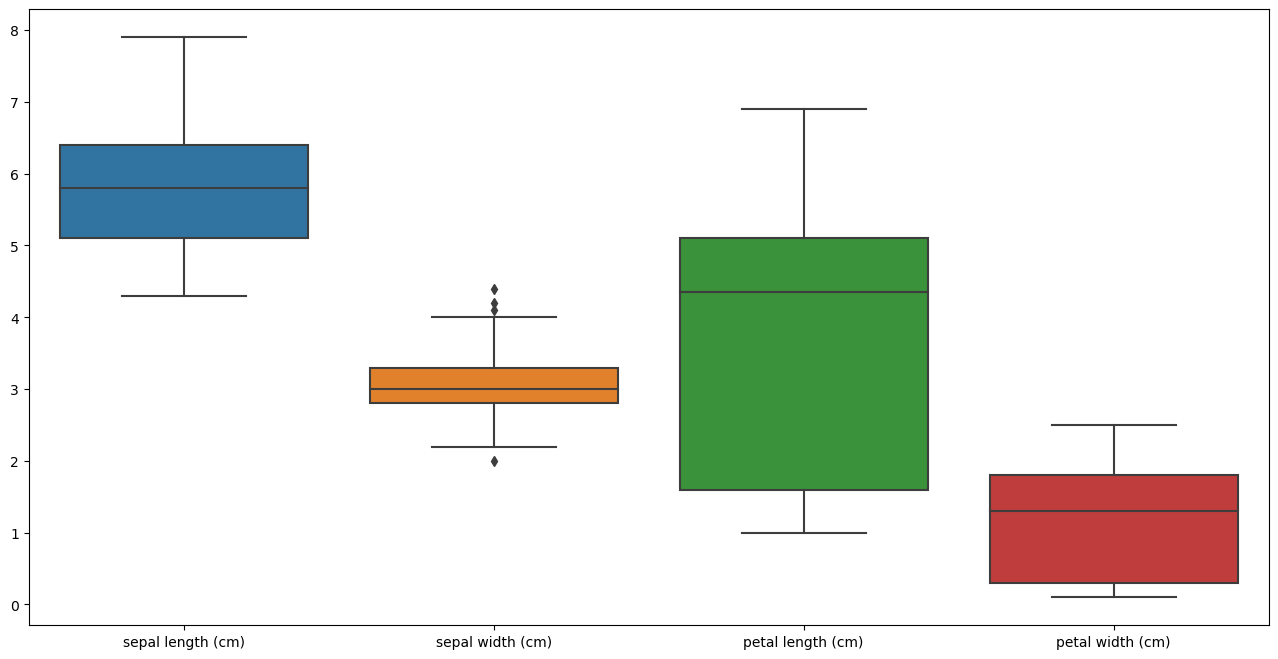

In [7]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.boxplot(data=df_iris[['sepal length (cm)', 
                               'sepal width (cm)', 
                               'petal length (cm)', 
                               'petal width (cm)']])

plt.show()

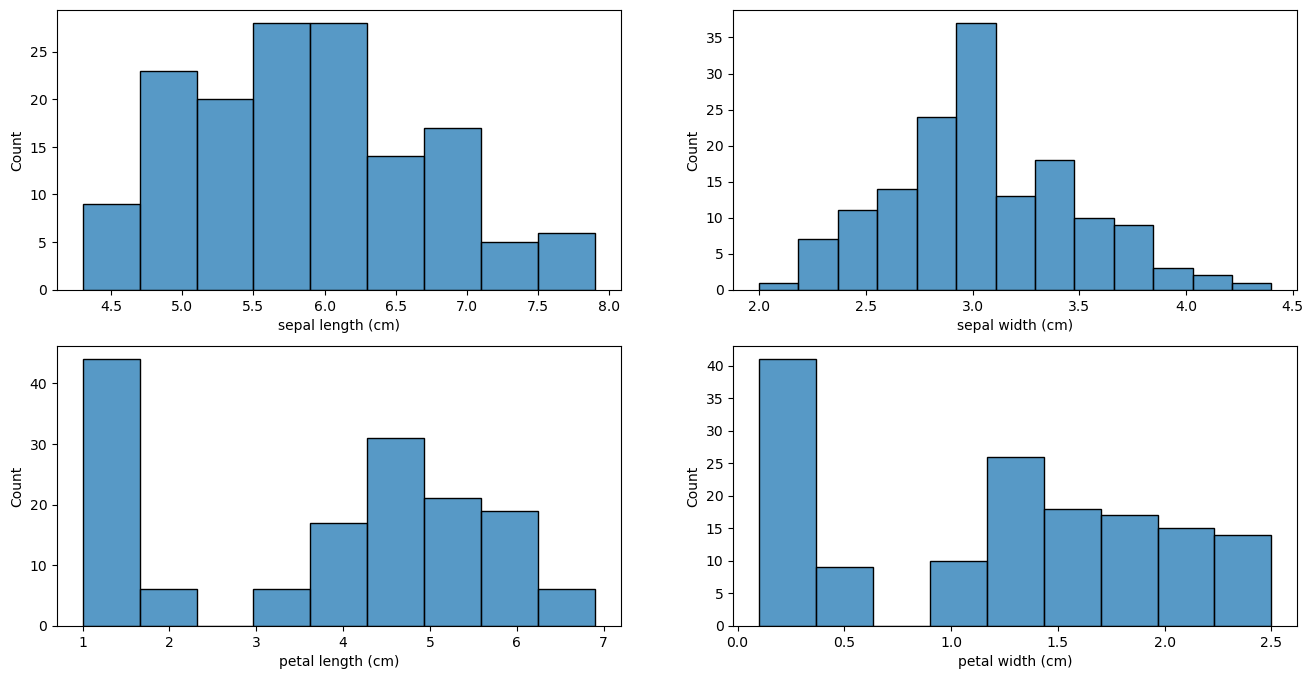

In [8]:
fig, axs = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(16,8))

plt.sca(axs[0,0])
sns.histplot(data=df_iris,
             x='sepal length (cm)')

plt.sca(axs[0,1])
sns.histplot(data=df_iris,
             x='sepal width (cm)')

plt.sca(axs[1,0])
sns.histplot(data=df_iris,
             x='petal length (cm)')

plt.sca(axs[1,1])
sns.histplot(data=df_iris,
             x='petal width (cm)')

plt.show()

In [9]:
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


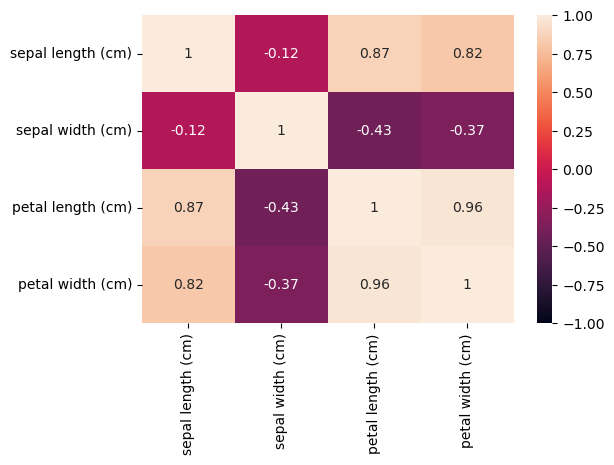

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(data=df_iris.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

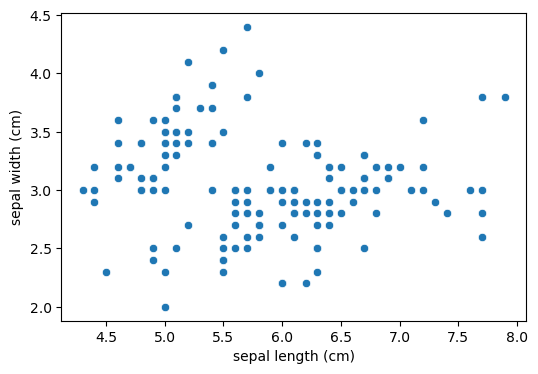

In [11]:
# no correlation
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=df_iris, 
                     x='sepal length (cm)', 
                     y='sepal width (cm)')

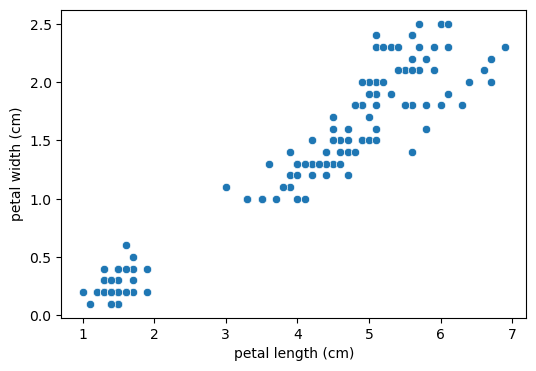

In [12]:
# high correlation
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=df_iris, 
                     x='petal length (cm)', 
                     y='petal width (cm)')

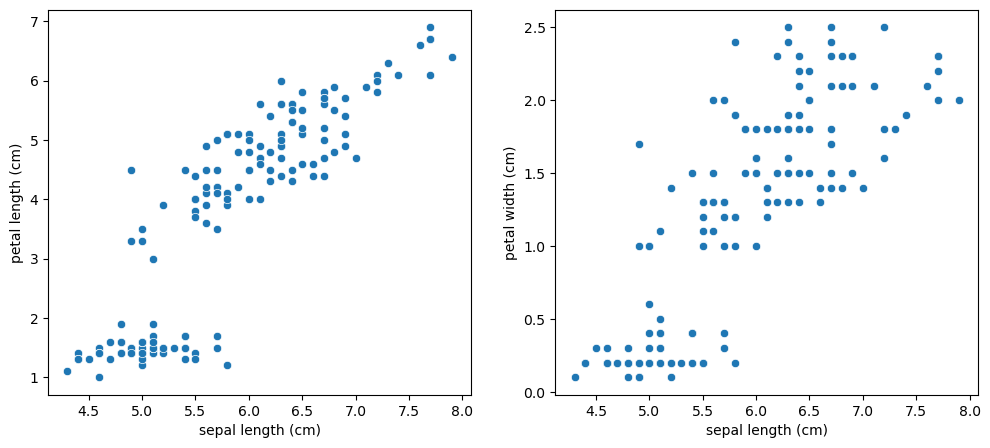

In [13]:
# high-medium correlation
fig, axs = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(12,5))

plt.sca(axs[0])
sns.scatterplot(data=df_iris, 
                x='sepal length (cm)', 
                y='petal length (cm)')

plt.sca(axs[1])
sns.scatterplot(data=df_iris, 
                x='sepal length (cm)', 
                y='petal width (cm)')

plt.show()

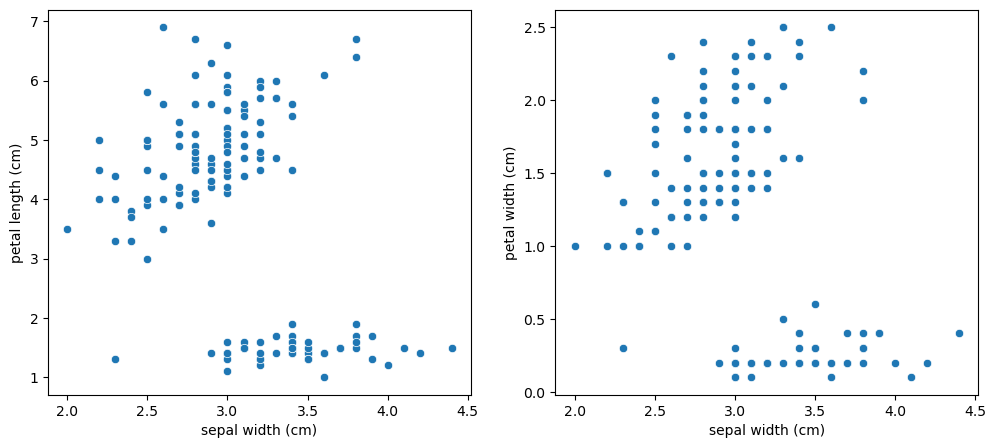

In [14]:
# no correlation
fig, axs = plt.subplots(ncols=2,
                        nrows=1,
                        figsize=(12,5))

plt.sca(axs[0])
sns.scatterplot(data=df_iris, 
                x='sepal width (cm)', 
                y='petal length (cm)')

plt.sca(axs[1])
sns.scatterplot(data=df_iris, 
                x='sepal width (cm)', 
                y='petal width (cm)')

plt.show()

In [15]:
# new features size
df_iris_size = df_iris.copy()
df_iris_size['sepal size'] = df_iris_size.apply(lambda x: x['sepal length (cm)'] * x['sepal width (cm)'], axis=1)
df_iris_size['petal size'] = df_iris_size.apply(lambda x: x['petal length (cm)'] * x['petal width (cm)'], axis=1)
df_iris_size

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal size,petal size
0,5.1,3.5,1.4,0.2,17.85,0.28
1,4.9,3.0,1.4,0.2,14.70,0.28
2,4.7,3.2,1.3,0.2,15.04,0.26
3,4.6,3.1,1.5,0.2,14.26,0.30
4,5.0,3.6,1.4,0.2,18.00,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96
146,6.3,2.5,5.0,1.9,15.75,9.50
147,6.5,3.0,5.2,2.0,19.50,10.40
148,6.2,3.4,5.4,2.3,21.08,12.42


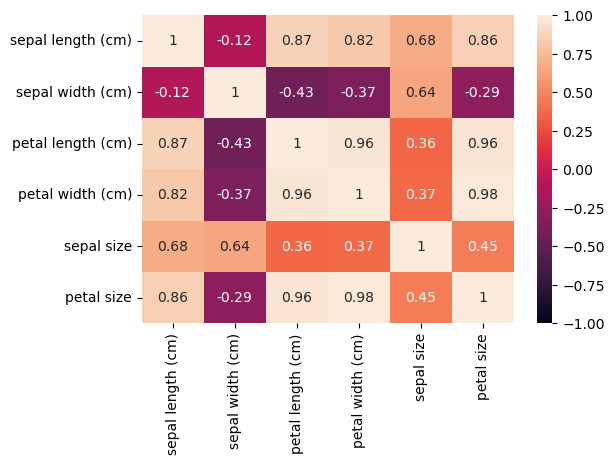

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(data=df_iris_size.corr(), 
                 vmin=-1,
                 vmax=1,
                 annot=True)

In [17]:
df_iris.to_csv('my-iris-data.csv', index=False)

### Notes
- 150 records.
- No null values.
- No categorical data. All values are numerical values.
- ¿Scalling? No significantly different.
- No significant outliers (a few values in sepal width).
- Mean and median very similar in sepal size (outliers offset the mean).
- Median higher than mean in petal size. More low values.
- Sepal width and sepal length, no correlation.
- Petal width and petal length, high correlation. Petal width largest, petal length largest too.
- Sepal length, high correlation with petal width and length. Sepal length largest, petal length and width largest too.
- New size features, no additional value.